In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from keras.layers import Input, Dense
from keras.models import Model


In [29]:
data = "/Users/sindhujach/Desktop/ECE_699/Traffic_simulation/Weeklytask-5thnov/fcd_output.xlsx"
df = pd.read_excel(data)

In [30]:
df.head()

,id,x,y,angle,type,speed,pos,lane,slope,time
0,flow_aggressive_E.0,94.9,101.6,270.0,aggressive,11.54,5.1,-E31_1,0.0,0.0
1,flow_aggressive_N.0,-101.6,294.9,180.0,aggressive,14.31,5.1,-E30_1,0.0,0.0
2,flow_aggressive_W.0,-294.9,98.4,90.0,aggressive,14.53,5.1,-E29_1,0.0,0.0
3,flow_default_E.0,94.9,104.8,270.0,default,13.03,5.1,-E31_0,0.0,0.0
4,flow_default_N.0,-104.8,294.9,180.0,default,14.72,5.1,-E30_0,0.0,0.0


Exploratory Data Analysis

In [15]:
df.describe(include='all')

,id,x,y,angle,type,speed,pos,lane,slope,time
count,498084,498084.000000,498084.000000,498084.000000,498084,498084.000000,498084.000000,498084,498084.0,498084.000000
unique,671,NaN,NaN,NaN,7,NaN,NaN,44,NaN,NaN
top,flow_default_S.16,NaN,NaN,NaN,default,NaN,NaN,E28_0,NaN,NaN
freq,2900,NaN,NaN,NaN,130498,NaN,NaN,76433,NaN,NaN
mean,NaN,-92.237416,103.803782,163.091354,NaN,5.869905,76.942290,NaN,0.0,501.861091
std,NaN,82.866089,81.975530,106.558782,NaN,4.985841,49.382074,NaN,0.0,287.577717
min,NaN,-299.900000,-99.890000,0.000000,NaN,0.000000,0.000000,NaN,0.0,0.000000
25%,NaN,-158.580000,33.890000,79.300000,NaN,1.610000,29.090000,NaN,0.0,252.800000
50%,NaN,-94.920000,97.180000,174.670000,NaN,4.890000,80.030000,NaN,0.0,501.900000
75%,NaN,-9.900000,194.352500,270.000000,NaN,10.210000,125.170000,NaN,0.0,750.900000


In [16]:
df.isnull().sum()

id       0
x        0
y        0
angle    0
type     0
speed    0
pos      0
lane     0
slope    0
time     0
dtype: int64

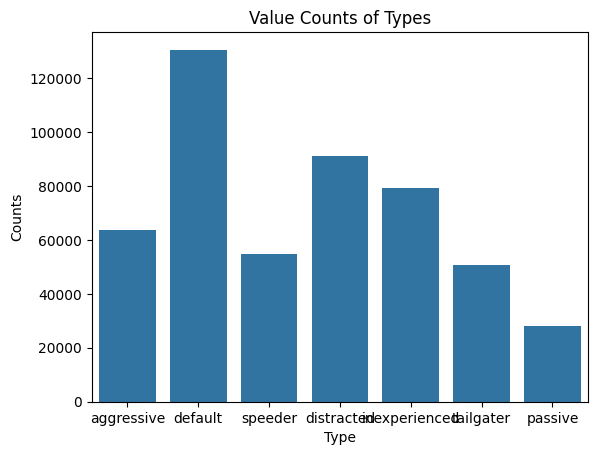

In [17]:
sns.countplot(data = df, x = 'type')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.title('Value Counts of Types')
plt.show()

In [18]:
df = df.drop('id', axis = 1)
df.head()

,x,y,angle,type,speed,pos,lane,slope,time
0,94.9,101.6,270.0,aggressive,11.54,5.1,-E31_1,0.0,0.0
1,-101.6,294.9,180.0,aggressive,14.31,5.1,-E30_1,0.0,0.0
2,-294.9,98.4,90.0,aggressive,14.53,5.1,-E29_1,0.0,0.0
3,94.9,104.8,270.0,default,13.03,5.1,-E31_0,0.0,0.0
4,-104.8,294.9,180.0,default,14.72,5.1,-E30_0,0.0,0.0


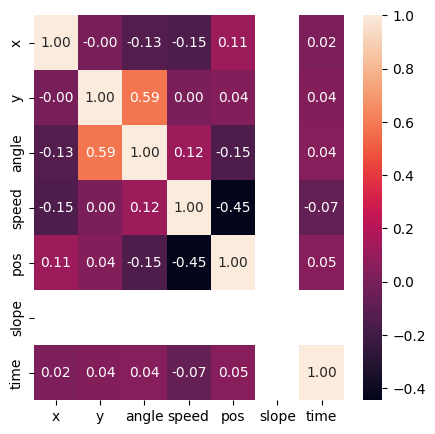

In [8]:
df1 = df.drop('type', axis = 1)
df1 = df1.drop('lane', axis = 1)
plt.figure(figsize=(5, 5))
sns.heatmap(df1.corr(), annot=True, fmt=".2f")
plt.show()

In [19]:
type_to_number = {
    "default": 1,
    "aggressive": 2,
    "speeder": 3,
    "distracted": 4,
    "inexperienced": 5,
    "tailgater": 6,
    "passive": 7
}

df['type_number'] = df['type'].map(type_to_number)

# If you want to replace the 'type' column entirely with 'type_number':
df['type'] = df['type'].map(type_to_number)


In [20]:
# Separate features and target
X = df.drop('type', axis=1)
y = df['type']

In [22]:
df = df.drop('type', axis = 1)
df.rename(columns={'type_number': 'type'}, inplace=True)
df.head()

,x,y,angle,speed,pos,lane,slope,time,type
0,94.9,101.6,270.0,11.54,5.1,-E31_1,0.0,0.0,2
1,-101.6,294.9,180.0,14.31,5.1,-E30_1,0.0,0.0,2
2,-294.9,98.4,90.0,14.53,5.1,-E29_1,0.0,0.0,2
3,94.9,104.8,270.0,13.03,5.1,-E31_0,0.0,0.0,1
4,-104.8,294.9,180.0,14.72,5.1,-E30_0,0.0,0.0,1


In [25]:
scaler = StandardScaler()
X = df.drop('lane', axis = 1)
X = X.drop('type', axis = 1)
X_scaled = scaler.fit_transform(X)

In [26]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
scaler = StandardScaler()
df = df.drop('lane', axis = 1)
data_scaled = scaler.fit_transform(df.drop('type', axis=1))  
data_scaled = pd.DataFrame(data_scaled, columns=df.columns[:-1])

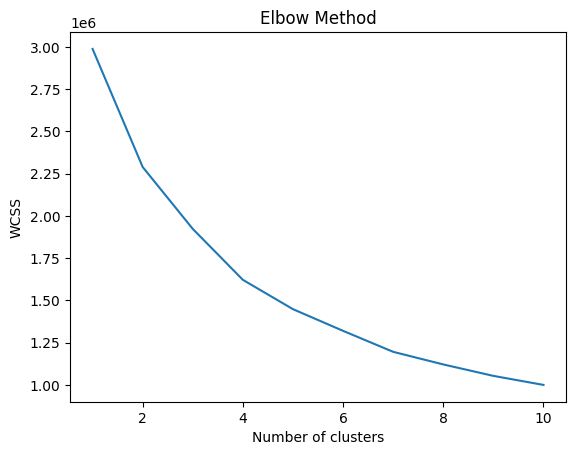

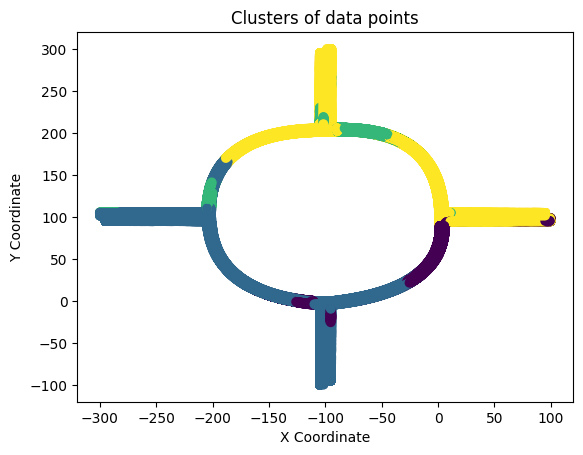

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = data_scaled[['x', 'y', 'angle', 'speed', 'pos', 'slope', 'time']]

wcss = []  # Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the results of the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters (k) based on the elbow plot and apply K-Means clustering
k = 4  # This is an example, choose k based on the elbow plot
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(features)

# Add the cluster IDs to the original DataFrame
df['Cluster'] = clusters

# Plot the clusters to visualize them
plt.scatter(df['x'], df['y'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters of data points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

Random Forest Classifier 

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, df['type'], test_size=0.3, random_state=42)

In [88]:
# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [89]:
# Train the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
# Make predictions on the test set
predictions = classifier.predict(X_test)

In [91]:
# Evaluate the classifier
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           1       0.97      0.97      0.97     38818
           2       0.76      0.75      0.76     19163
           3       0.90      0.83      0.86     16517
           4       0.81      0.85      0.83     27274
           5       0.77      0.81      0.79     23974
           6       0.76      0.74      0.75     15374
           7       0.75      0.72      0.73      8306

    accuracy                           0.84    149426
   macro avg       0.82      0.81      0.81    149426
weighted avg       0.84      0.84      0.84    149426

Accuracy: 0.8399475325579217


In [64]:
y = df['type']

Multilayer Perceptron

In [92]:
from sklearn.neural_network import MLPClassifier

# Initialize the Multi-Layer Perceptron classifier
mlp_model = MLPClassifier(random_state=42)

# Train the classifier
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
mlp_predictions = mlp_model.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, mlp_predictions))
print("MLP Classifier Accuracy:", accuracy_score(y_test, mlp_predictions))

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.44      0.68      0.54     38818
           2       0.28      0.32      0.30     19163
           3       0.57      0.23      0.33     16517
           4       0.39      0.33      0.36     27274
           5       0.32      0.32      0.32     23974
           6       0.27      0.12      0.17     15374
           7       0.33      0.27      0.30      8306

    accuracy                           0.38    149426
   macro avg       0.37      0.33      0.33    149426
weighted avg       0.38      0.38      0.37    149426

MLP Classifier Accuracy: 0.38360793971597984


Deep Neural Networks

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the deep neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dropout(0.5))                                              # Dropout layer for regularization
model.add(Dense(64, activation='relu'))                              # Second hidden layer
model.add(Dense(32, activation='relu'))                              # Third hidden layer
model.add(Dense(len(y.unique()), activation='softmax'))               # Output layer with 'softmax' for multi-class classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',                # Use 'sparse_categorical_crossentropy' for integer labels
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Convert labels to categorical integer labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
17433/17433 [==============================] - 97s 5ms/step - loss: 1.6962 - accuracy: 0.2928 - val_loss: 1.6323 - val_accuracy: 0.3112
Epoch 2/50
17433/17433 [==============================] - 91s 5ms/step - loss: 1.6443 - accuracy: 0.3072 - val_loss: 1.6048 - val_accuracy: 0.3184
Epoch 3/50
17433/17433 [==============================] - 92s 5ms/step - loss: 1.6278 - accuracy: 0.3124 - val_loss: 1.5939 - val_accuracy: 0.3214
Epoch 4/50
17433/17433 [==============================] - 101s 6ms/step - loss: 1.6191 - accuracy: 0.3139 - val_loss: 1.5885 - val_accuracy: 0.3245
Epoch 5/50
17433/17433 [==============================] - 99s 6ms/step - loss: 1.6130 - accuracy: 0.3173 - val_loss: 1.5827 - val_accuracy: 0.3260
Epoch 6/50
17433/17433 [==============================] - 96s 5ms/step - loss: 1.6060 - accuracy: 0.3198 - val_loss: 1.5779 - val_accuracy: 0.3268
Epoch 7/50
17433/17433 [==============================] - 95s 5ms/step - loss: 1.6007 - accuracy: 0.3218 - val_loss: 

KNN Classifer

In [94]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, knn_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions)) 

              precision    recall  f1-score   support

           1       0.84      0.89      0.87     38818
           2       0.72      0.72      0.72     19163
           3       0.85      0.74      0.79     16517
           4       0.82      0.84      0.83     27274
           5       0.79      0.80      0.80     23974
           6       0.76      0.71      0.74     15374
           7       0.77      0.75      0.76      8306

    accuracy                           0.80    149426
   macro avg       0.79      0.78      0.79    149426
weighted avg       0.80      0.80      0.80    149426

KNN Accuracy: 0.8029258629689612
